<a href="https://colab.research.google.com/github/sciedex/corrosion_detection/blob/main/CAPSTONE_HACTIV8_Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KELOMPOK 1 | HACTIV8-02 CLASS

# PROBLEM STATEMENT

Latar Belakang:
- Korosi pada Logam merupakan masalah serius yang mempengaruhi berbagai industri, termasuk perminyakan, gas, kelautan, konstruksi, dan manufaktur yang menyebabkan kerusakan struktural, meningkatkan biaya pemeliharaan, dan menimbulkan risiko keselamatan.

Masalah yang dihadapi:
- Keterbatasan Metode Tradisional
- Memerlukan waktu dan sumber daya yang signifikan
- Dapat menyebabkan tertundanya pemeliharaan dan peningkatan biaya operasional
- Potensi bahaya keselamatan karena keterlambatan deteksi

Solusi:
- Mengembangkan Sistem Deteksi Korosi Otomatis menggunakan metode computer vision
- Menggunakan model YOLOv8
- Mengidentifikasi dan melokalisasi area korosi pada permukaan logam dengan akurasi dan efisiensi tinggi
- Mengurangi ketergantungan pada inspeksi manual
- Meningkatkan keandalan dan kecepatan deteksi korosi

# THE DATASETS

Texture:
- critical: merah/hitam/coklat tua, kasar, hancur
- moderate: coklat muda, halus

# INITIALIZING START

In [ ]:
!nvidia-smi

Sun Jun 16 07:15:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# IMPORTING LIBRARY AND YOLO INSTALLATION

In [ ]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76


# HANDLING DATASET

## PRE PROCESSING DATA

### Labeling Dataset Images

Roboflow platform gives us easiest way to labeling image with our 2 target such as critical and moderate.

<div style="display: flex; justify-content: center; align-items: center;">
  <img
    width="460"
    src="https://drive.google.com/uc?export=view&id=15cUh2AZXvSfoNKYp0ZAY0p_n1lkXQ5kA"
    style="margin-right: 10px;"
  >
  <img
    width="460"
    src="https://drive.google.com/uc?export=view&id=1zma2eLOe5yVRKiulT-7lUh8sz6G0oLOi"
  >
</div>

### Pre processing images

We doing some changes the images with:
- Resize: Stretch to 640x640
- Auto-Orient: Applied Static
- Crop: 25-75% Horizontal Region, 25-75% Vertical Region
- Auto-Adjust Contrast: Using Adaptive Equalization
- Tile: 2 rows x 2 columns

<div style="display: flex; justify-content: center; align-items: center;">
  <img
    width="460"
    src="https://raw.githubusercontent.com/opencv-ai/roboflow/master/images/preprocessing.png"
    style="margin-right: 10px;"
  >
</div>

## AUGMENTATION DATA

### Augmentation data images

By doing augmentation, our data images increase from 150 to 1138 data images. Our option such as:
- 90° Rotate: Clockwise, Counter-Clockwise
- Crop: 0% Minimum Zoom, 30% Maximum Zoom
- Rotation: Between -15° and +15°
- Shear: ±10° Horizontal, ±10° Vertical
- Saturation: Between -25% and +25%
- Exposure: Between -10% and +10%
- Blur: Up to 2.5px
- Noise: Up to 1.5% of pixels


<div style="display: flex; justify-content: center; align-items: center;">
  <img
    width="460"
    src="https://lh6.googleusercontent.com/kJvLrqaVYfnvvIeE7E2_1gjq6FNTuhtIFKZJyva96xTaW2pLi9oy_CHRj-VIO6Wz7EfrP7Y-EimymWWQK17gFG3csxbHMyElQbUL96lSZ8Bh57FE9TPhRNwaM-a9F_1o2rdgK8Zc7M-RMUN3SLWvx8k"
    style="margin-right: 10px;"
  >
</div>

# IMPORTING FIXED DATASET

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="IzeMFewuXIG0WFDzuEZA")
# project = rf.workspace("my-ml").project("corrosion-azppx")
# version = project.version(1)
# dataset = version.download("yolov5")

# new dataset 1000+

# from roboflow import Roboflow
# rf = Roboflow(api_key="IzeMFewuXIG0WFDzuEZA")
# project = rf.workspace("my-ml").project("corrosion-azppx")
# version = project.version(2)
# dataset = version.download("yolov5")

# from roboflow import Roboflow
# rf = Roboflow(api_key="IzeMFewuXIG0WFDzuEZA")
# project = rf.workspace("my-ml").project("corrosion-azppx")
# version = project.version(4)
# dataset = version.download("yolov8")


# classes 2 texture

from roboflow import Roboflow
rf = Roboflow(api_key="IzeMFewuXIG0WFDzuEZA")
project = rf.workspace("my-ml").project("corrosion-texture")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Corrosion-texture-1 in yolov8:: 100%|██████████| 2282/2282 [00:01<00:00, 1844.06it/s]


# DEFINE MODEL CONF and ARC

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- critical
- moderate
nc: 2
roboflow:
  license: CC BY 4.0
  project: corrosion-texture
  url: https://universe.roboflow.com/my-ml/corrosion-texture/dataset/1
  version: 1
  workspace: my-ml
test: test/images
train: train/images
val: valid/images


In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'2'

In [ ]:
#this is the model configuration we will use and customize
%cat /content/yolov5/models/segment/yolov5m-seg.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/segment/custom_yolov5-seg.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.67 # model depth multiple
width_multiple: 0.75 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Segment, [nc, anchors, 32, 256]], # Detect(P3, P4, P5)
  ]


# TRAINING AND TESTING MODEL

**Model comparison:**

<table border="1" cellspacing="0" cellpadding="5">
  <tr>
    <th>Model</th>
    <th>Size (pixels)</th>
    <th>mAPbox 50-95</th>
    <th>mAPmask 50-95</th>
    <th>Speed CPU ONNX (ms)</th>
    <th>Speed A100 TensorRT (ms)</th>
    <th>Params (M)</th>
    <th>FLOPs (B)</th>
  </tr>
  <tr>
    <td>YOLOv8n-seg</td>
    <td>640</td>
    <td>36.7</td>
    <td>30.5</td>
    <td>96.1</td>
    <td>1.21</td>
    <td>3.4</td>
    <td>12.6</td>
  </tr>
  <tr>
    <td>YOLOv8s-seg</td>
    <td>640</td>
    <td>44.6</td>
    <td>36.8</td>
    <td>155.7</td>
    <td>1.47</td>
    <td>11.8</td>
    <td>42.6</td>
  </tr>
  <tr>
    <td>YOLOv8m-seg</td>
    <td>640</td>
    <td>49.9</td>
    <td>40.8</td>
    <td>317.0</td>
    <td>2.18</td>
    <td>27.3</td>
    <td>110.2</td>
  </tr>
  <tr>
    <td>YOLOv8l-seg</td>
    <td>640</td>
    <td>52.3</td>
    <td>42.6</td>
    <td>572.4</td>
    <td>2.79</td>
    <td>46.0</td>
    <td>220.5</td>
  </tr>
  <tr>
    <td>YOLOv8x-seg</td>
    <td>640</td>
    <td>53.4</td>
    <td>43.4</td>
    <td>712.1</td>
    <td>4.02</td>
    <td>71.8</td>
    <td>344.1</td>
  </tr>
</table>


ARSITEKTUR MODEL OF YOLOV8
<div style="display: flex; justify-content: center; align-items: center;">
  <img
    width="460"
    src="https://blog.roboflow.com/content/images/size/w1000/2024/04/image-1799.webp"
    style="margin-right: 10px;"
  >
</div>

LINK image architecture: [source](https://blog.roboflow.com/content/images/size/w1000/2024/04/image-1799.webp)

LINK YOLOv8n.pt: [source](https://drive.google.com/file/d/1wza6FmQFoQnFeLU6lJ2n241WDafGR_oH/view?usp=sharing)

In [ ]:
model = YOLO('yolov8n-seg.pt')

model.train(data='/content/Corrosion-texture-1/data.yaml', epochs=100)

100%|██████████| 6.73M/6.73M [00:00<00:00, 125MB/s]
New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Corrosion-texture-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af0e501e590>
fitness: 0.8163897402395774
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([      1.119,     0.47029])
names: {0: 'critical', 1: 'moderate'}
plot: True
results_dict: {'metrics/precision(B)': 0.5237778174745971, 'metrics/recall(B)': 0.6044973544973544, 'metrics/mAP50(B)': 0.5193343881071919, 'metrics/mAP50-95(B)': 0.40479326534249066, 'metrics/precision(M)': 0.5225310559160012, 'metrics/recall(M)': 0.5978835978835979, 'metrics/mAP50(M)': 0.49257160980797177, 'metrics/mAP50-95(M)': 0.38987244626646606, 'fitness': 0.8163897402395774}
save_dir: PosixPath('runs/segment/train')
seg: ultralytics.utils.metrics.Metric object


**Best model evaluation:**

<table>
  <thead>
    <tr>
      <th>Class</th>
      <th>Images</th>
      <th>Instances</th>
      <th>Box(P)</th>
      <th>R</th>
      <th>mAP50</th>
      <th>mAP50-95</th>
      <th>Mask(P)</th>
      <th>R</th>
      <th>mAP50</th>
      <th>mAP50-95</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>all</td>
      <td>97</td>
      <td>111</td>
      <td>0.524</td>
      <td>0.604</td>
      <td>0.519</td>
      <td>0.405</td>
      <td>0.523</td>
      <td>0.598</td>
      <td>0.493</td>
      <td>0.39</td>
    </tr>
    <tr>
      <td>critical</td>
      <td>97</td>
      <td>84</td>
      <td>0.698</td>
      <td>0.69</td>
      <td>0.692</td>
      <td>0.558</td>
      <td>0.721</td>
      <td>0.714</td>
      <td>0.713</td>
      <td>0.561</td>
    </tr>
    <tr>
      <td>moderate</td>
      <td>97</td>
      <td>27</td>
      <td>0.35</td>
      <td>0.519</td>
      <td>0.347</td>
      <td>0.252</td>
      <td>0.324</td>
      <td>0.481</td>
      <td>0.272</td>
      <td>0.219</td>
    </tr>
  </tbody>
</table>


- Kinerja Keseluruhan:
Untuk seluruh kelas (all), model memiliki presisi (Box(P)) sebesar 0.524, recall (R) sebesar 0.604, mean Average Precision pada IoU threshold 0.5 (mAP50) sebesar 0.519, dan mean Average Precision pada berbagai IoU thresholds (mAP50-95) sebesar 0.405.
Performa untuk deteksi objek menggunakan masker menunjukkan nilai presisi (Mask(P)) sebesar 0.523, recall (R) sebesar 0.598, mAP50 sebesar 0.493, dan mAP50-95 sebesar 0.39.

- Kelas Critical:
Kelas critical menunjukkan performa yang lebih baik dibandingkan kelas lainnya dengan presisi (Box(P)) sebesar 0.698 dan recall (R) sebesar 0.69.
mAP50 untuk kelas ini adalah 0.692, sedangkan mAP50-95 adalah 0.558.
Untuk deteksi menggunakan masker, presisi (Mask(P)) mencapai 0.721, recall (R) 0.714, mAP50 0.713, dan mAP50-95 0.561.
Ini menunjukkan bahwa model lebih baik dalam mendeteksi objek pada kelas critical dibandingkan kelas lainnya.

- Kelas Moderate:
Kelas moderate menunjukkan performa yang lebih rendah dibandingkan kelas lainnya, dengan presisi (Box(P)) hanya sebesar 0.35 dan recall (R) sebesar 0.519.
mAP50 untuk kelas ini adalah 0.347, dan mAP50-95 adalah 0.252.
Untuk deteksi menggunakan masker, presisi (Mask(P)) hanya sebesar 0.324, recall (R) 0.481, mAP50 0.272, dan mAP50-95 0.219.
Ini menunjukkan bahwa model memiliki kesulitan yang lebih besar dalam mendeteksi objek pada kelas moderate.

# VIZUALIZE EVALUATION TRAINING

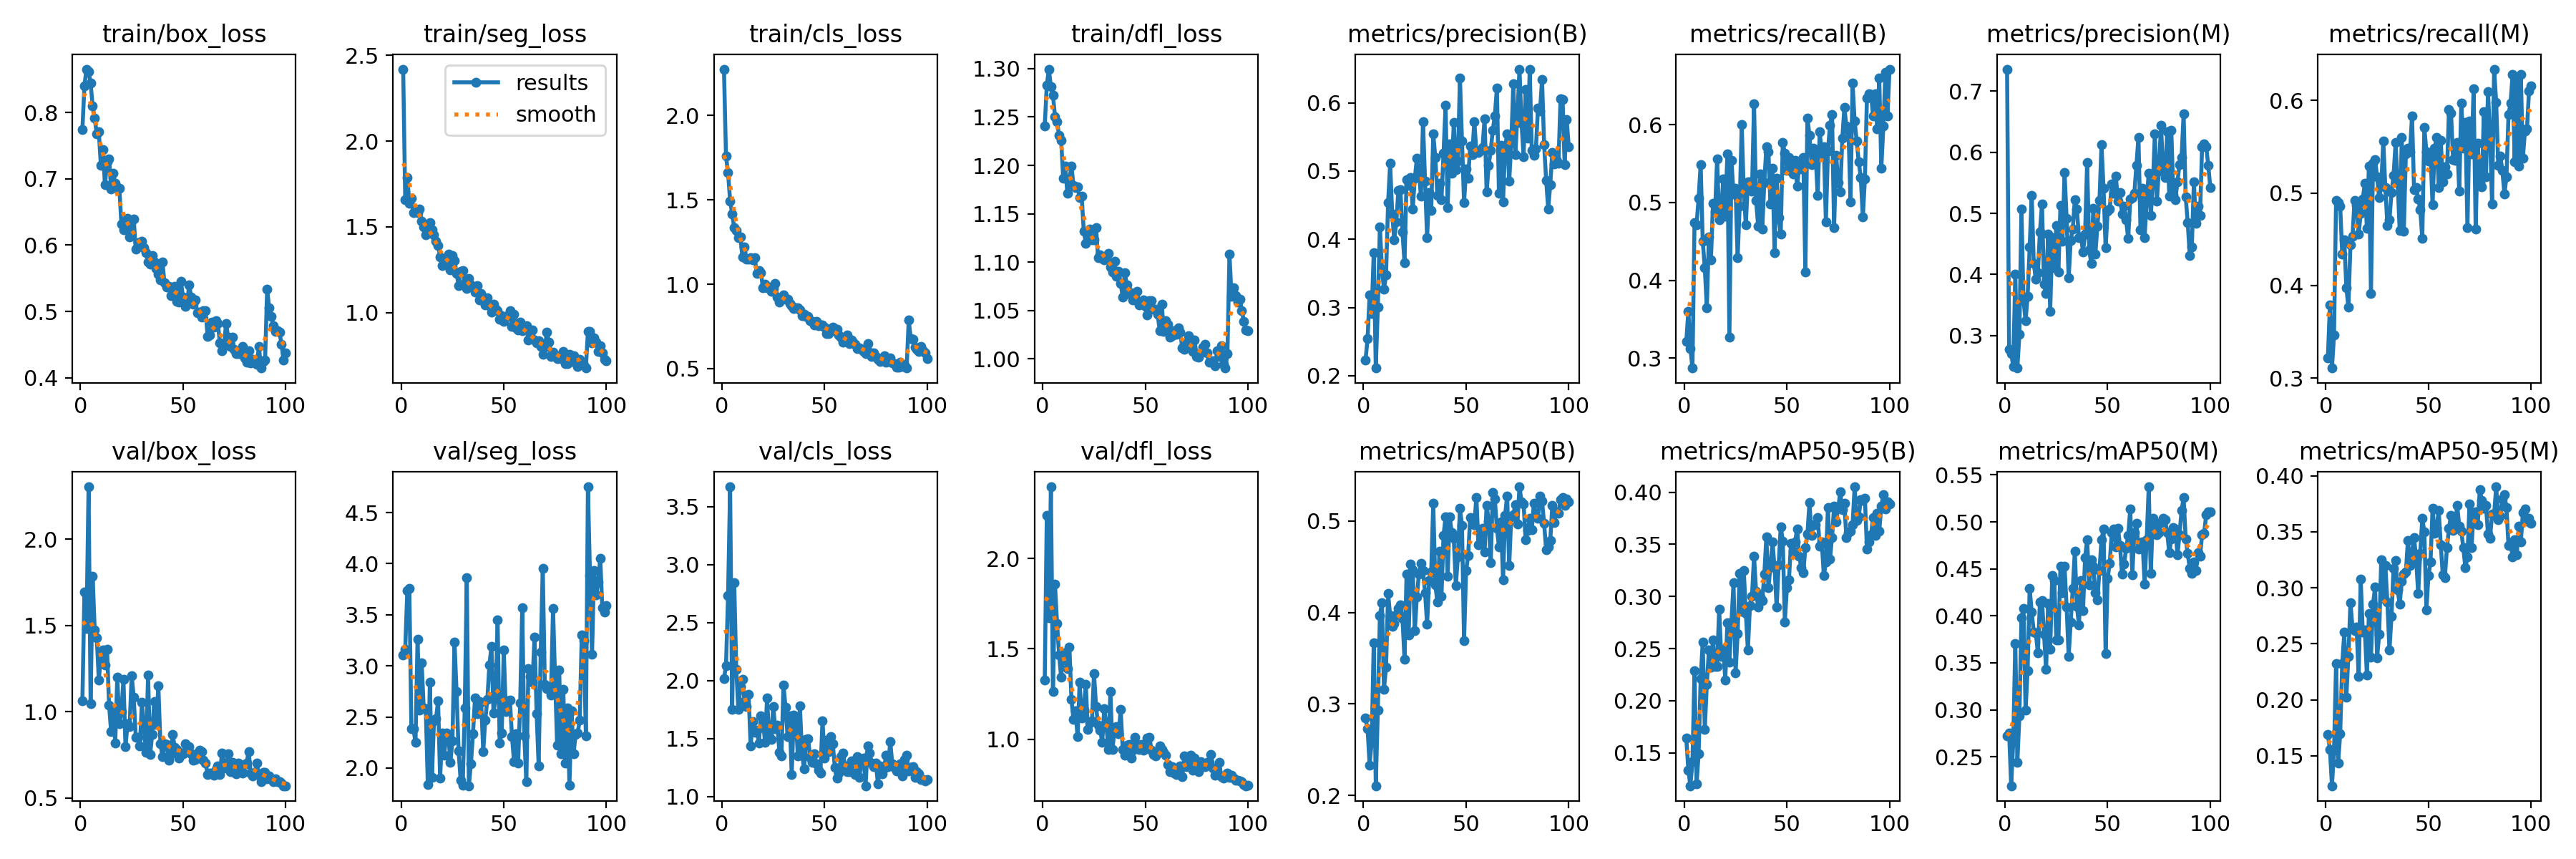

In [ ]:
from IPython.display import Image

Image(filename=f'/content/results.png', width=1200)

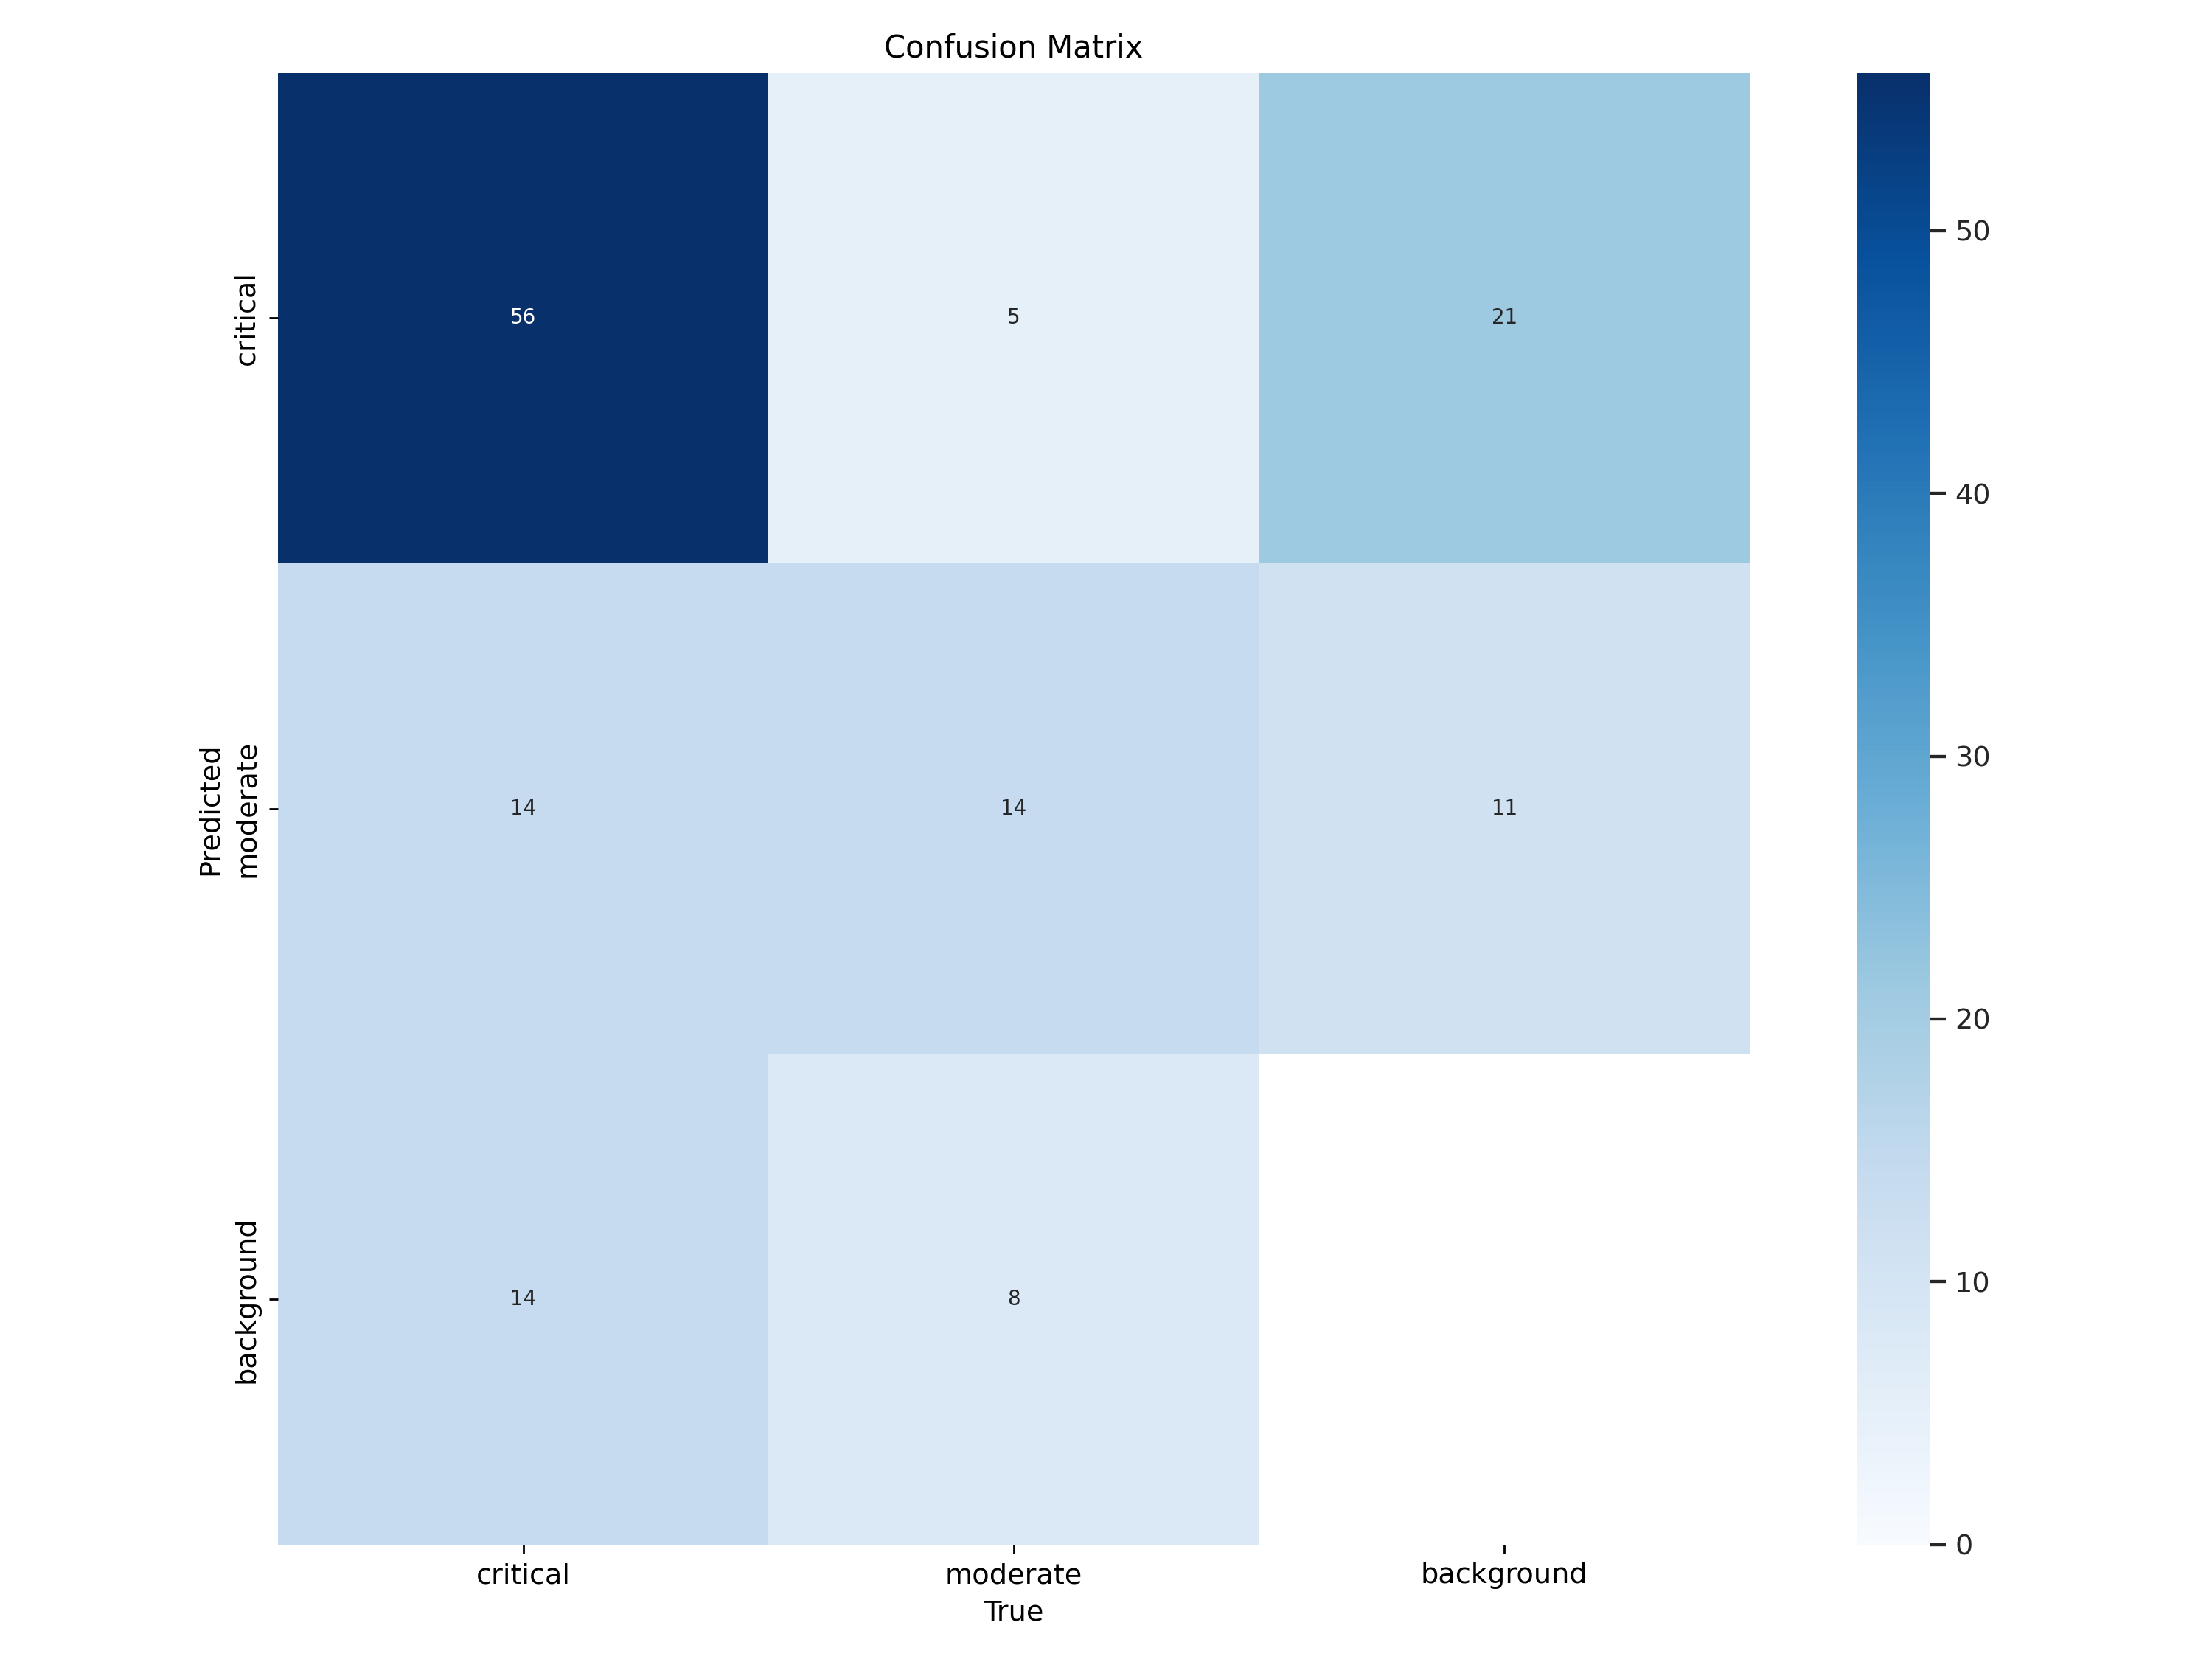

In [ ]:
Image(filename=f'/content/confusion_matrix.png', width=1200)

**Penjelasan rinci:**

Diagonal utama (dari kiri atas ke kanan bawah) menunjukkan prediksi yang benar:

- 56 contoh kritis diklasifikasikan dengan benar
- 14 contoh moderat diklasifikasikan dengan benar
- Tidak ada informasi untuk klasifikasi benar kelas latar belakang


Kesalahan klasifikasi:

- 5 contoh kritis salah diklasifikasikan sebagai moderat
- 21 contoh kritis salah diklasifikasikan sebagai latar belakang
- 14 contoh moderat salah diklasifikasikan sebagai kritis
- 11 contoh moderat salah diklasifikasikan sebagai latar belakang
- 14 contoh latar belakang salah diklasifikasikan sebagai kritis
- 8 contoh latar belakang salah diklasifikasikan sebagai moderat


Warna pada matriks menunjukkan intensitas, dengan warna lebih gelap menandakan jumlah yang lebih tinggi.

**SIMPULAN:** Model tampaknya paling akurat dalam mengklasifikasikan contoh kritis, namun memiliki beberapa kesalahan dalam membedakan antara kelas moderat dan latar belakang.

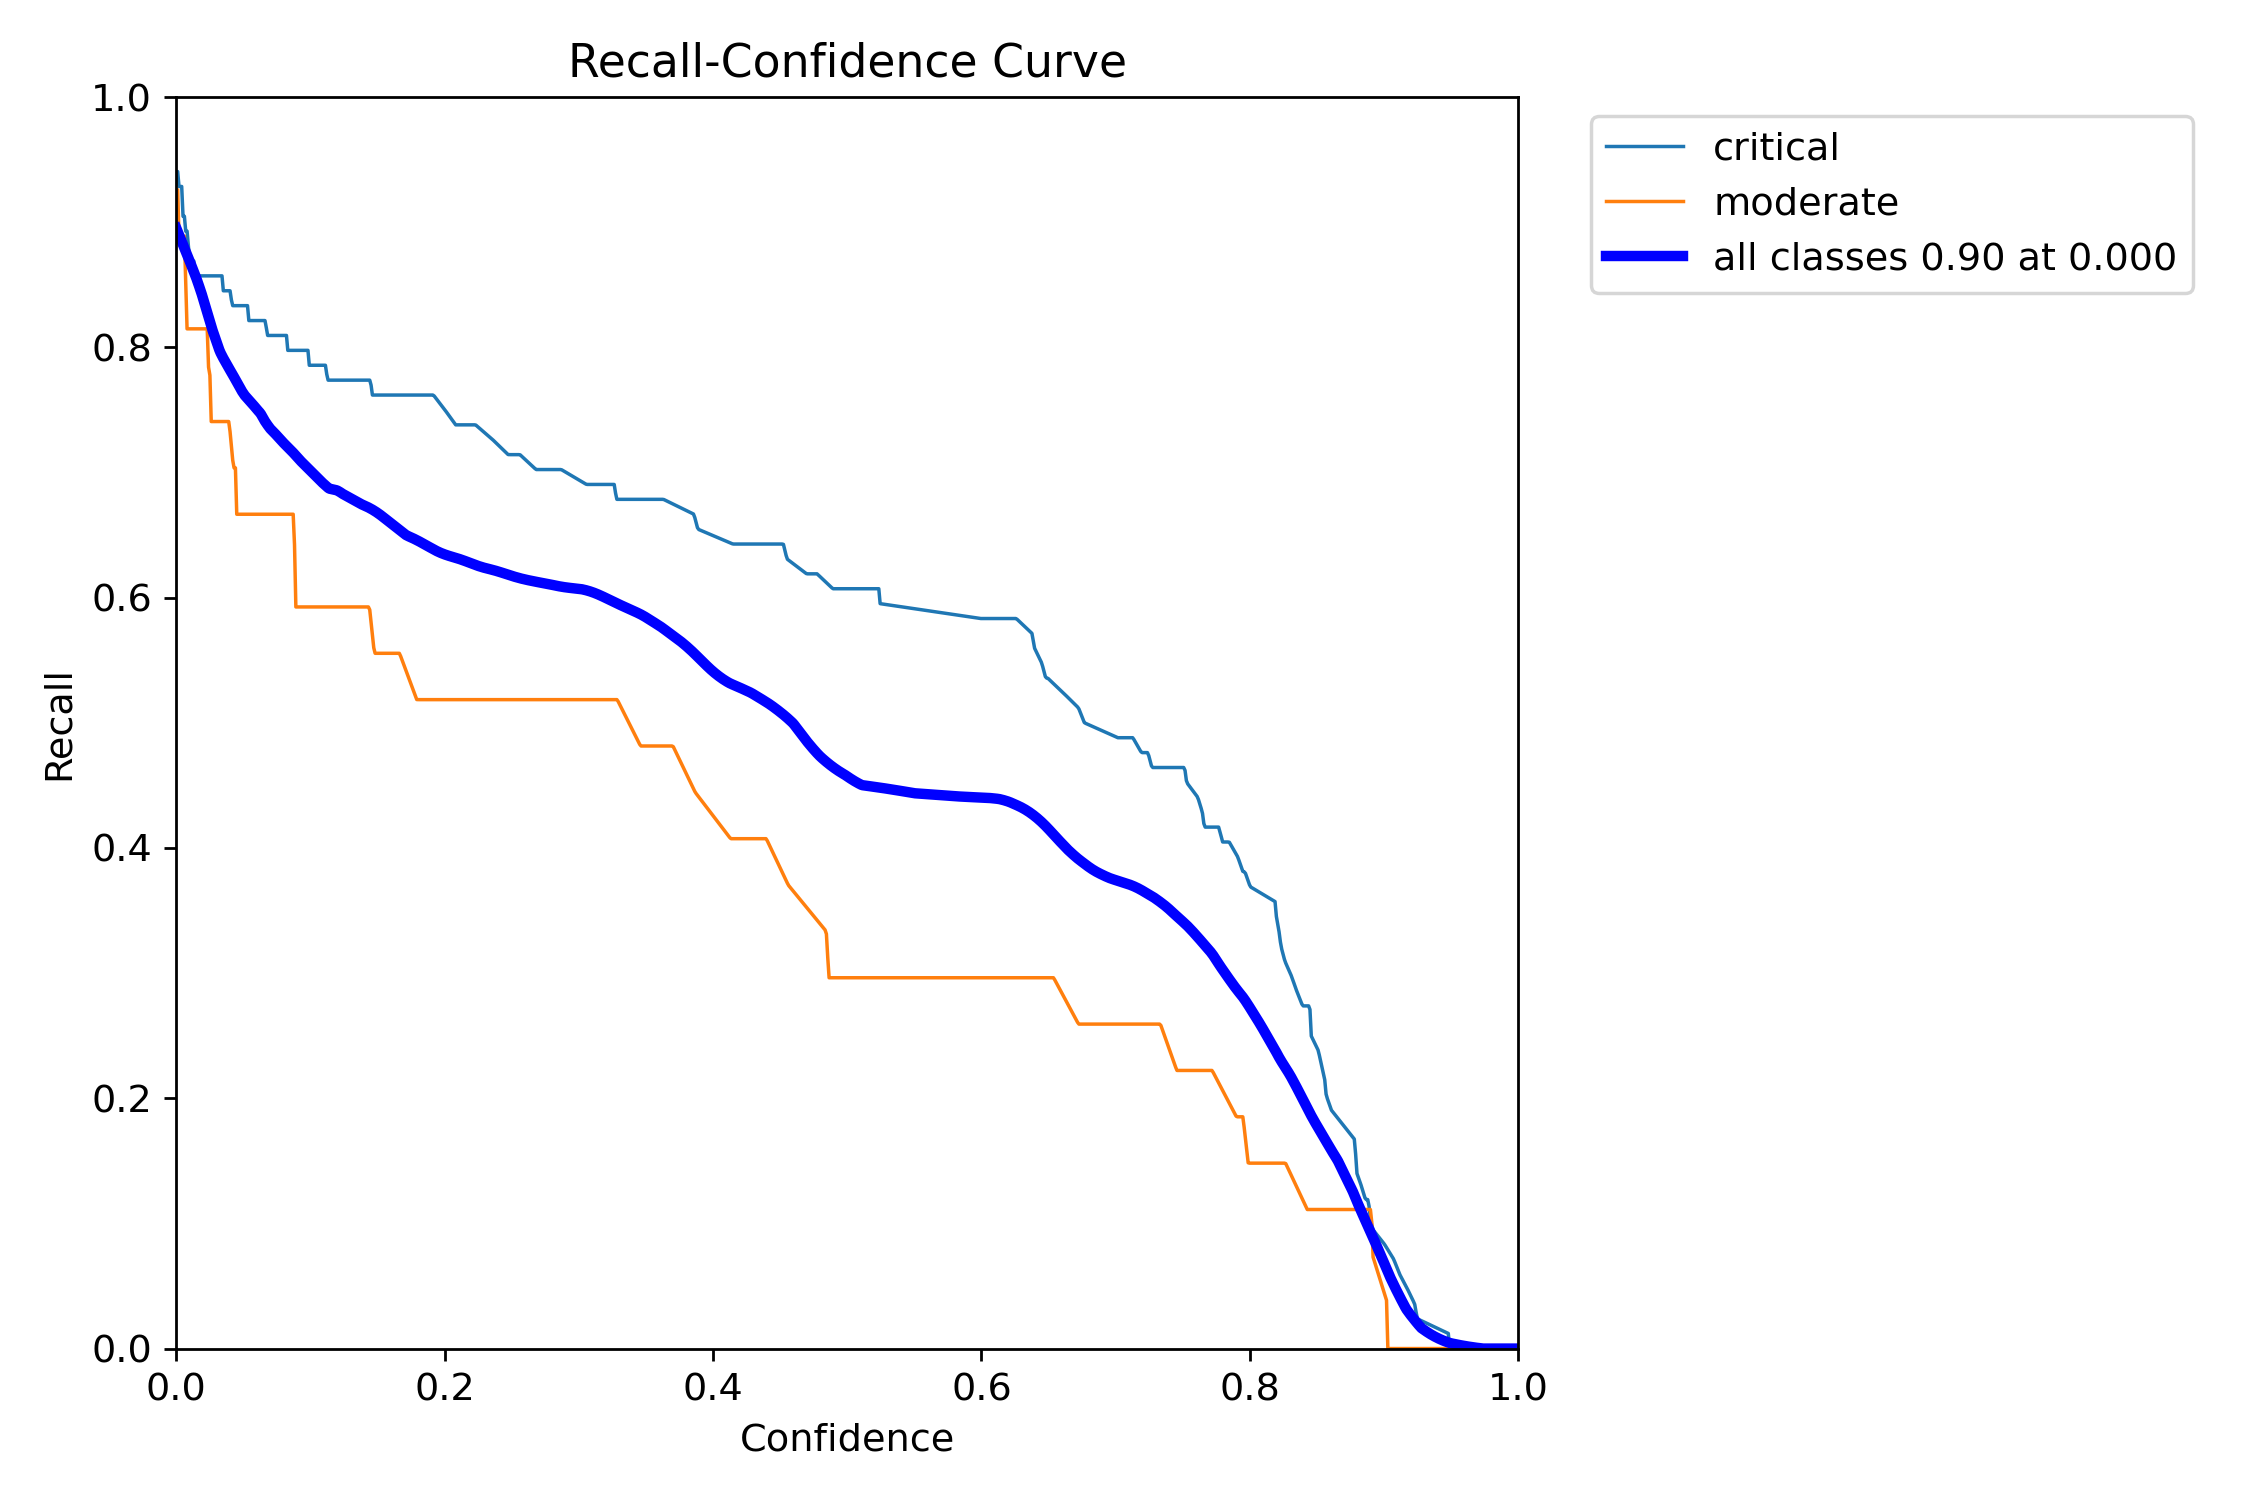

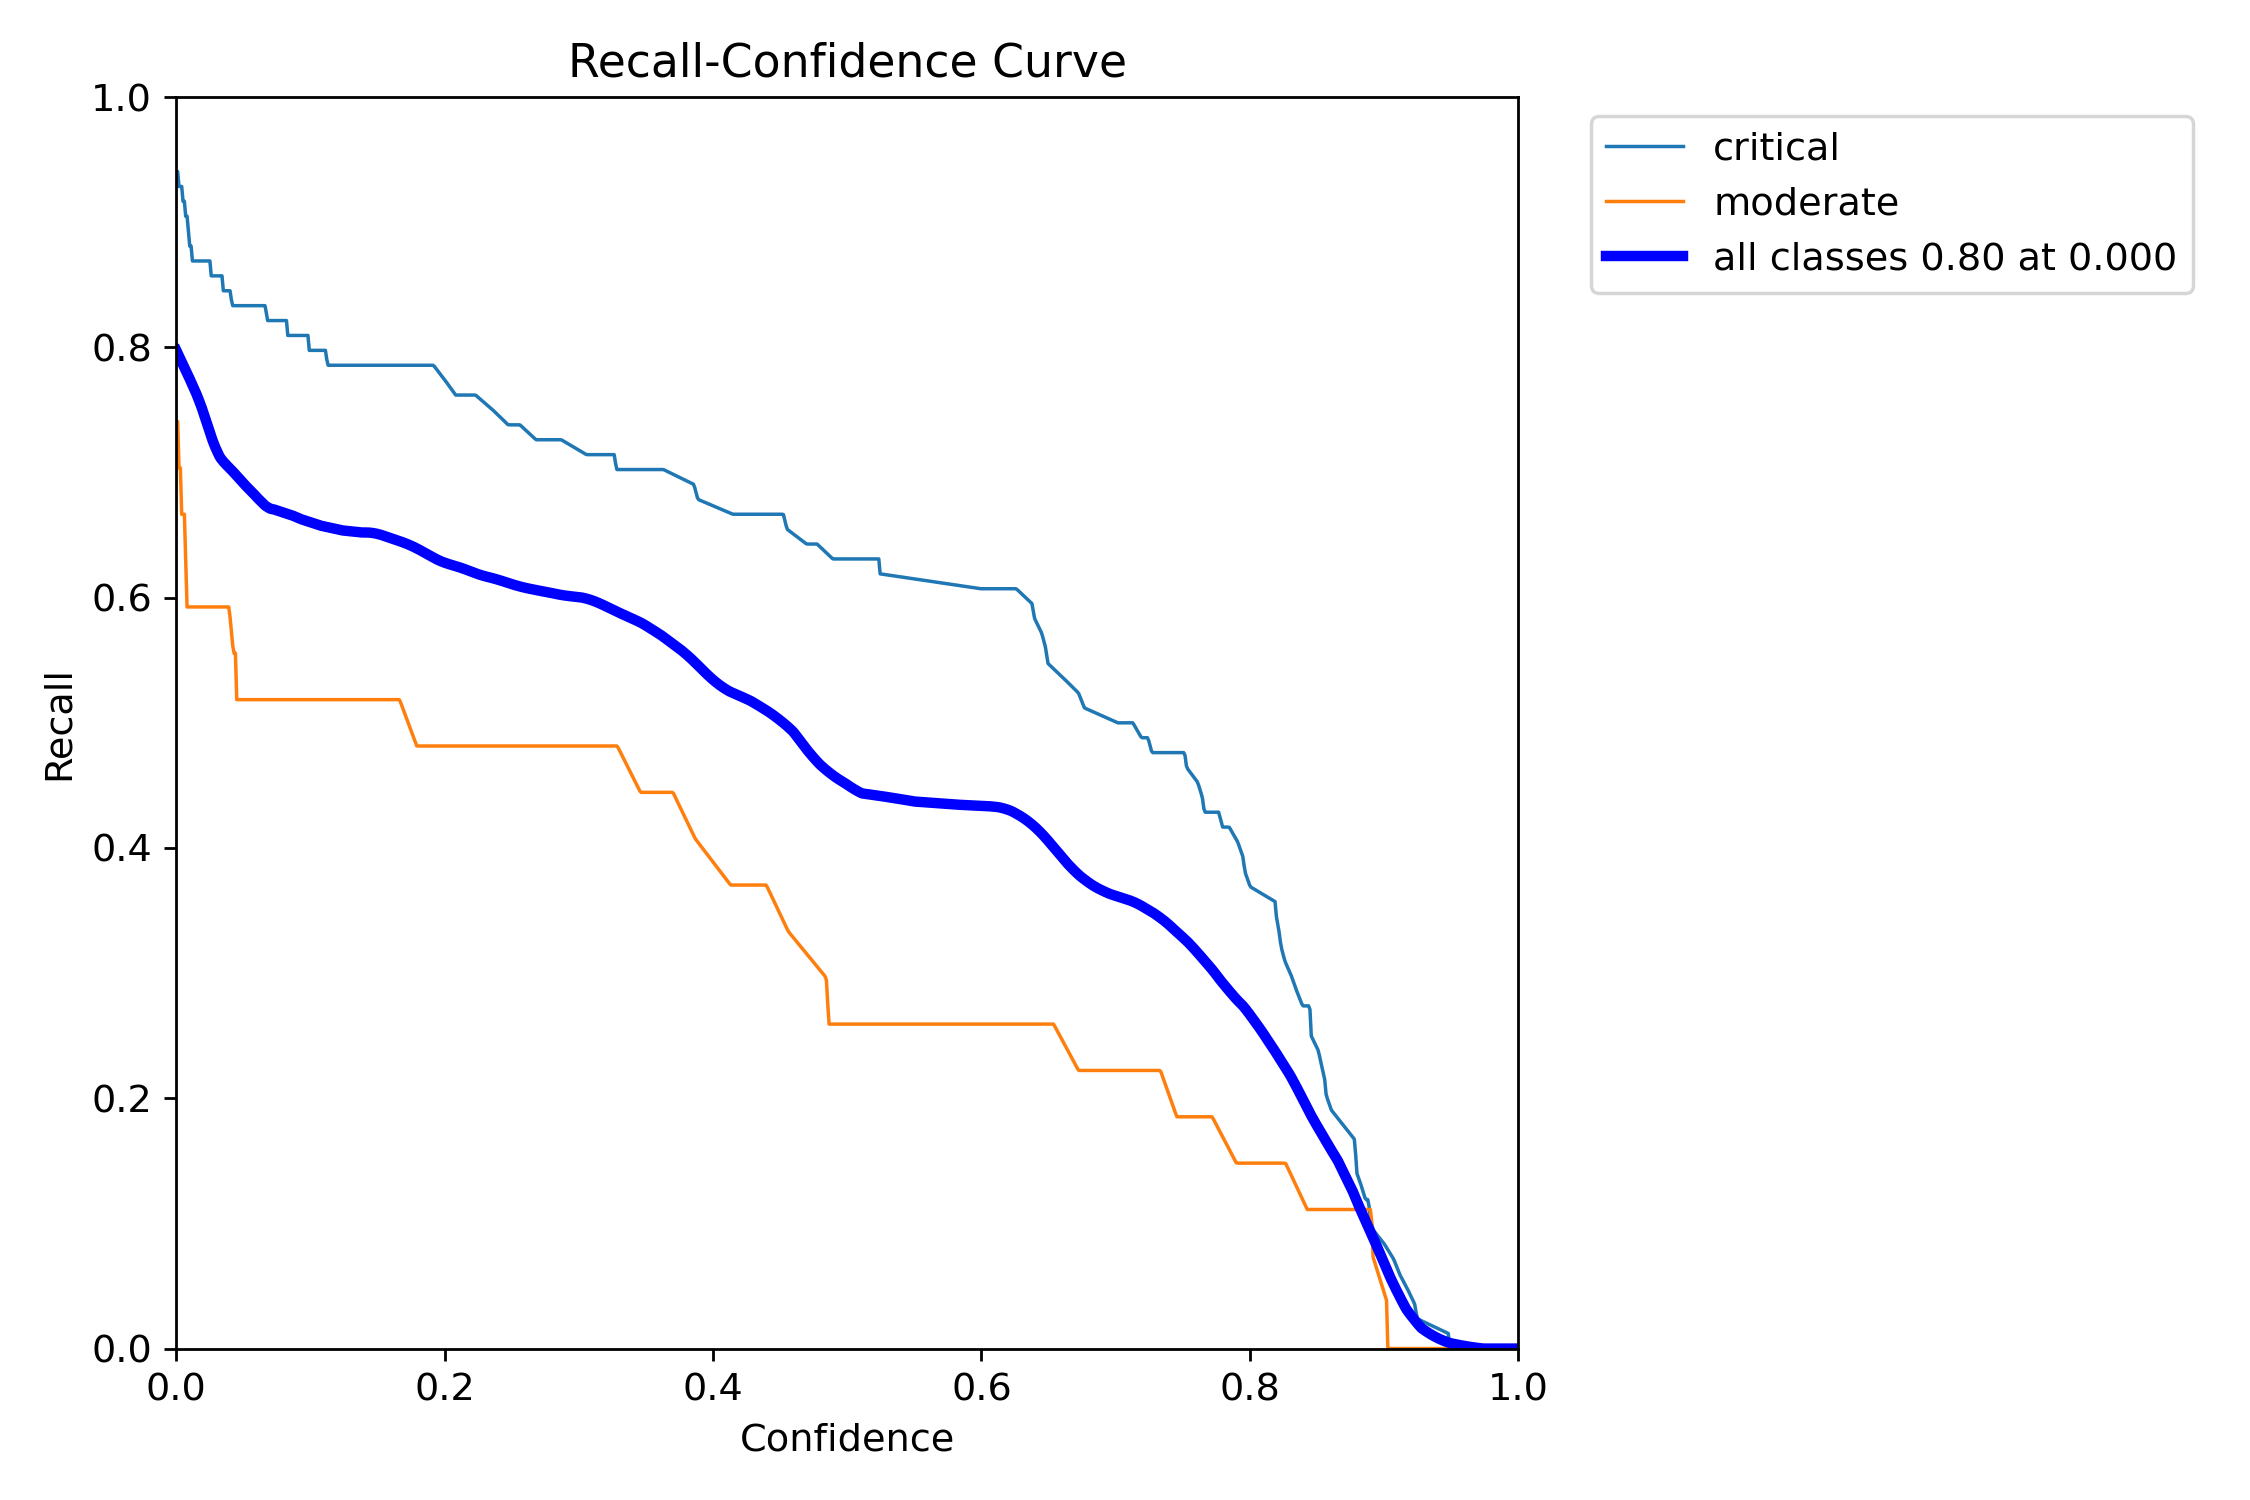

In [ ]:
display(Image(filename='/content/BoxR_curve.png', width=800))
display(Image(filename='/content/MaskR_curve.png', width=800))

**Penjelasan rinci:**
- dengan confidence rendah maka recall yang didapatkan model semakin tinggi sebaliknya confidence yang tinggi akan berdampak buruk pada hasil recall untuk box dan masking.

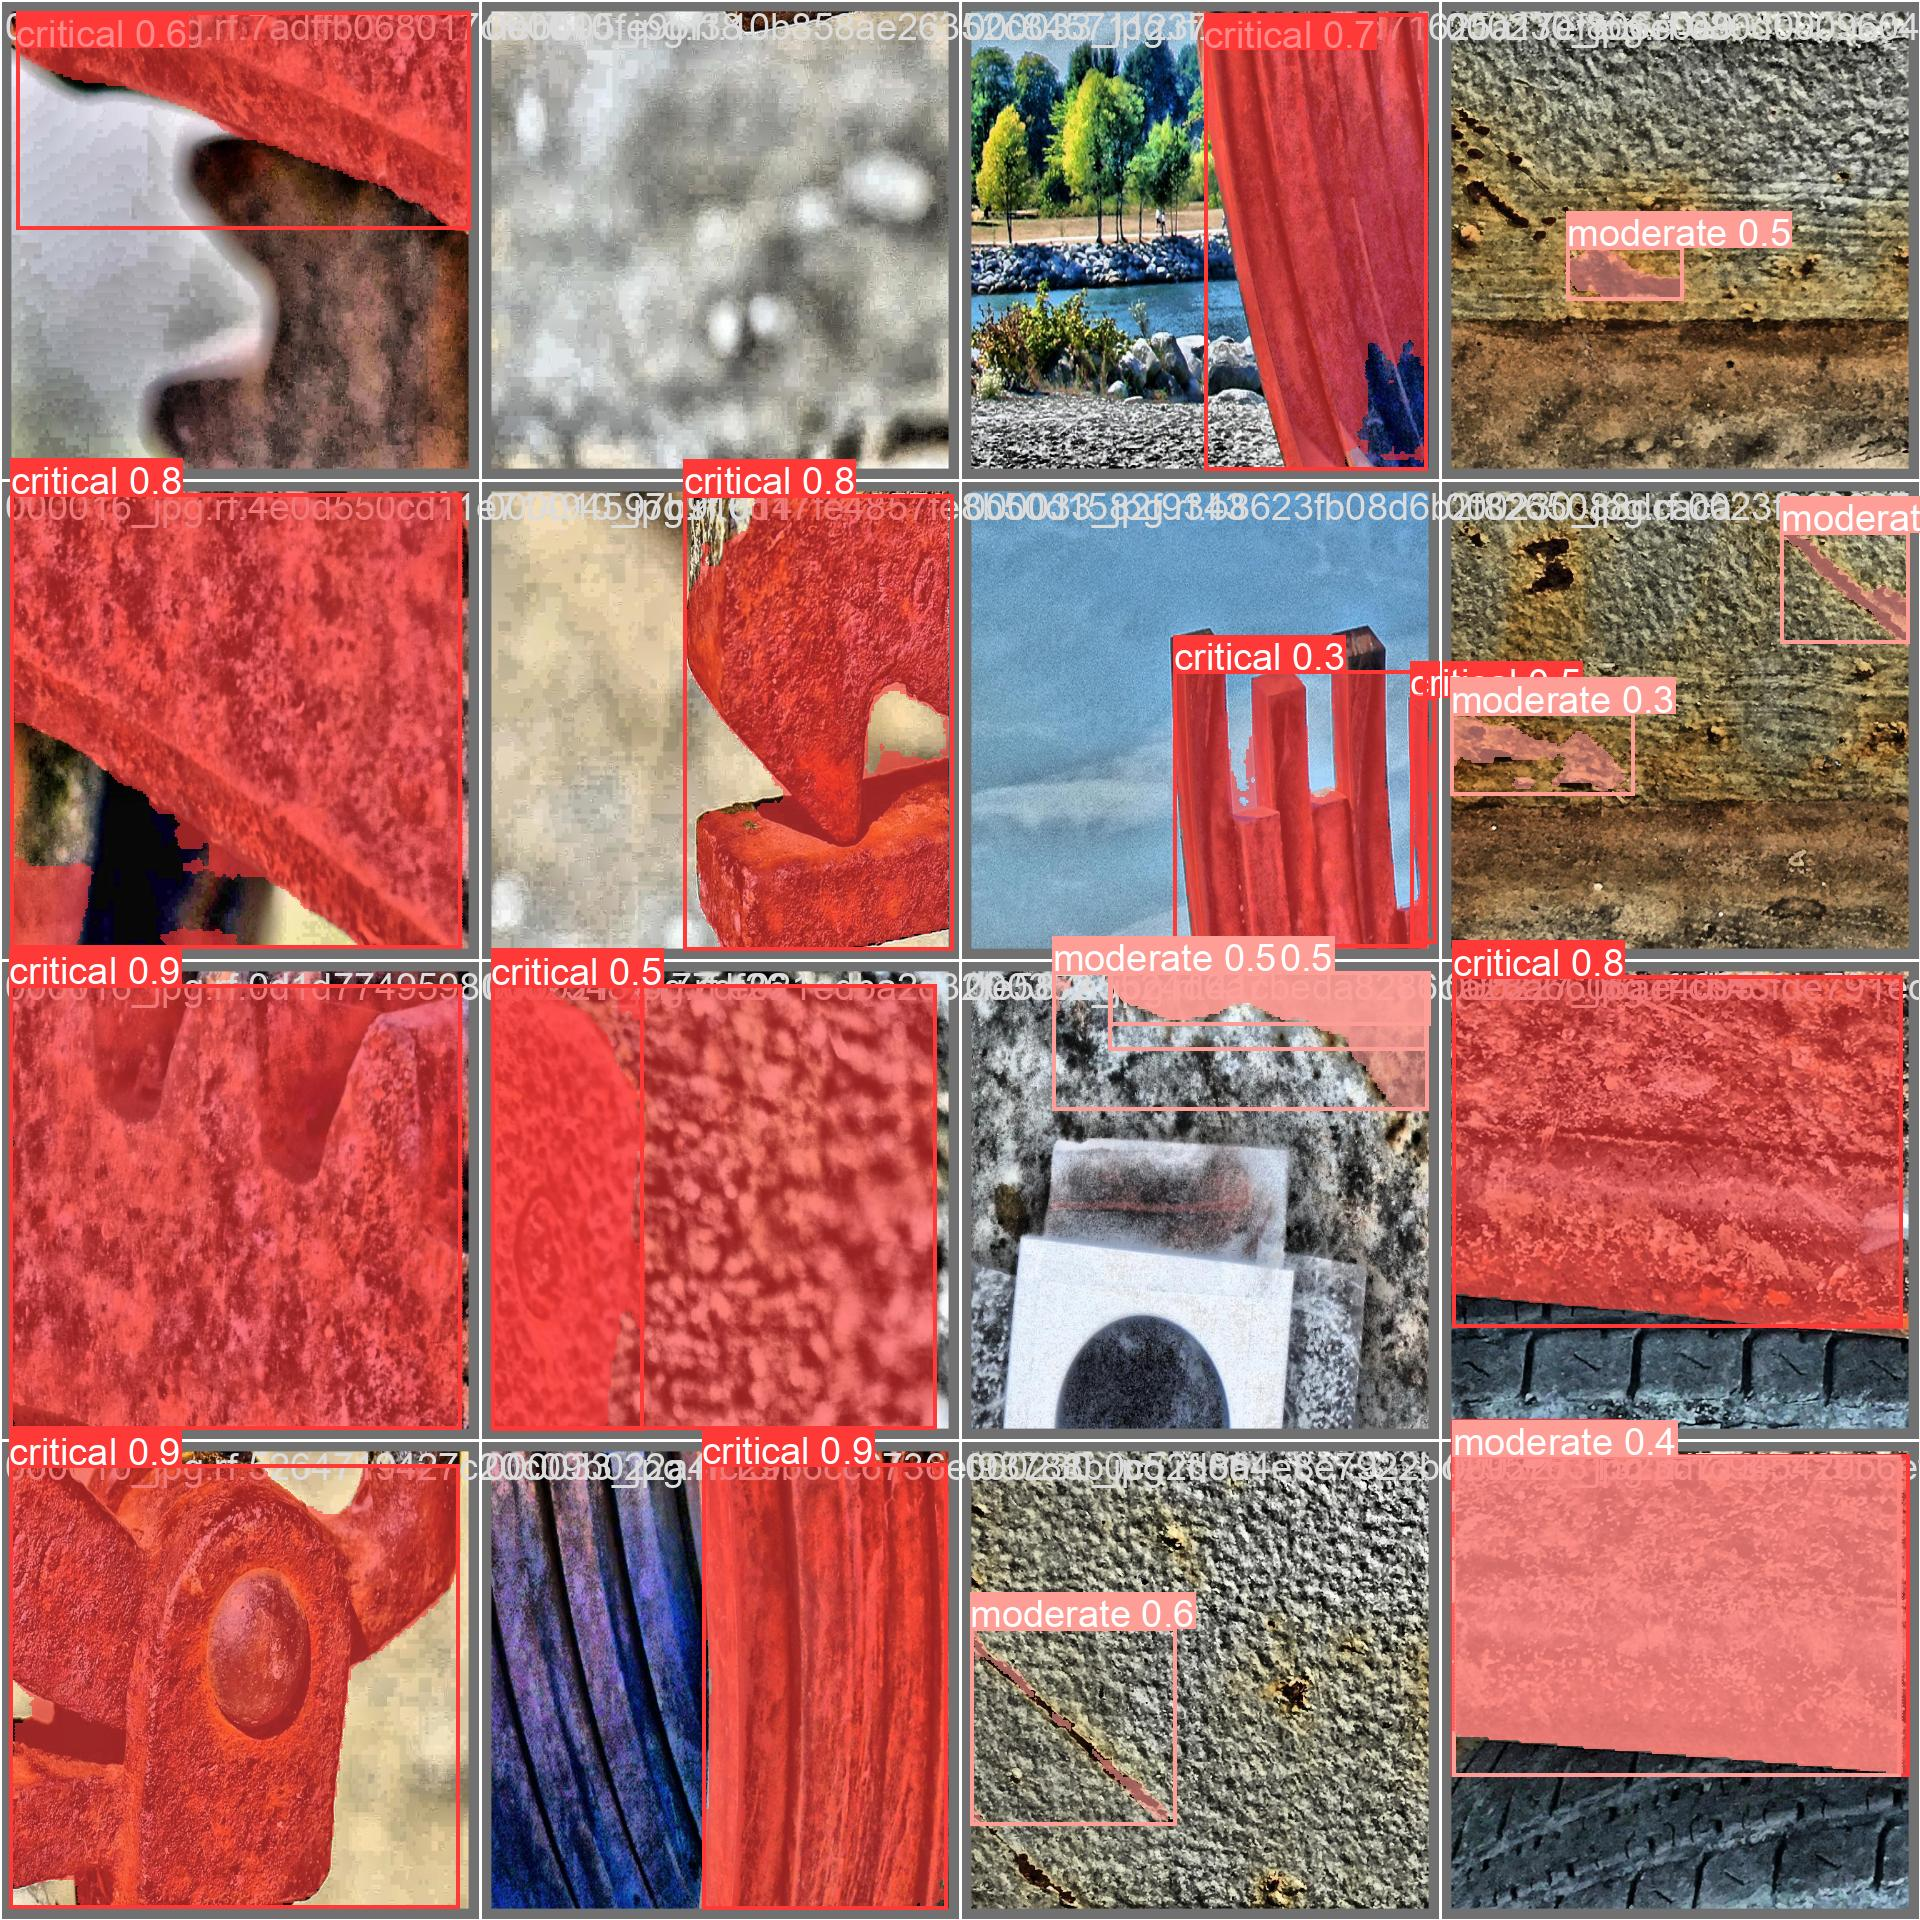

In [ ]:
Image(filename=f'/content/val_batch2_pred.jpg', width=1200)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/results.csv")

In [ ]:
df.head()

,epoch,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/precision(M),metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.77411,2.4202,2.2748,1.2410,0.22257,0.32143,0.28449,0.16393,0.73591,0.32143,0.27244,0.16879,1.0644,3.1097,2.0161,1.3273,0.000547,0.000547,0.000547
1,2,0.84032,1.6585,1.7577,1.2826,0.25441,0.36045,0.27294,0.13329,0.27789,0.37897,0.27549,0.15568,1.6932,3.1619,2.1296,2.2386,0.001092,0.001092,0.001092
2,3,0.86523,1.7890,1.6619,1.2995,0.31837,0.31217,0.23335,0.11849,0.27082,0.31085,0.21914,0.12326,1.4820,3.7354,2.7335,1.6698,0.001625,0.001625,0.001625
3,4,0.86170,1.6394,1.4939,1.2811,0.29153,0.28724,0.25847,0.14185,0.24985,0.34656,0.26609,0.15484,2.3048,3.7570,3.6725,2.3962,0.001618,0.001618,0.001618
4,5,0.84382,1.6651,1.4155,1.2725,0.38075,0.47421,0.36700,0.22847,0.40089,0.49206,0.37062,0.23205,1.0480,2.3878,1.7521,1.2633,0.001618,0.001618,0.001618


In [ ]:
df.tail()

,epoch,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/precision(M),metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,0.47088,0.77481,0.60140,1.0619,0.60577,0.54431,0.52343,0.38699,0.60939,0.53770,0.48602,0.36693,0.59607,3.8197,1.1936,0.76720,0.000116,0.000116,0.000116
96,97,0.46828,0.80558,0.63205,1.0501,0.60506,0.59788,0.52614,0.39759,0.61349,0.56696,0.48810,0.37026,0.59357,4.0549,1.1479,0.76482,0.000099,0.000099,0.000099
97,98,0.45051,0.76686,0.60458,1.0385,0.50939,0.66686,0.51708,0.38379,0.60899,0.56961,0.50740,0.35977,0.58523,3.5681,1.1468,0.74853,0.000083,0.000083,0.000083
98,99,0.42652,0.72632,0.59136,1.0296,0.57608,0.61116,0.52440,0.39076,0.57876,0.61045,0.51051,0.36197,0.57091,3.5253,1.1334,0.74205,0.000066,0.000066,0.000066
99,100,0.43746,0.72006,0.55911,1.0294,0.53560,0.67130,0.52115,0.38882,0.54209,0.61574,0.51078,0.35760,0.57115,3.5896,1.1446,0.74287,0.000050,0.000050,0.000050


# VALIDATE MODEL

In [ ]:
!yolo task=segment mode=val model=/content/best.pt data=/content/Corrosion-texture-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs
100% 755k/755k [00:00<00:00, 14.2MB/s]
val: Scanning /content/Corrosion-texture-1/valid/labels... 97 images, 1 backgrounds, 0 corrupt: 100% 97/97 [00:00<00:00, 874.47it/s]
val: New cache created: /content/Corrosion-texture-1/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 7/7 [00:59<00:00,  8.47s/it]
                   all         97        111      0.523      0.604      0.519      0.404      0.522      0.598      0.492       0.39
              critical         97         84      0.696       0.69      0.692      0.559       0.72      0.714      0.713      0.562
              moderate         97         27      0.349      0.519      0.347       0.25      0.324      0.481      0.272      0.218
Speed: 14.8ms prep

**Penjelasan Rinci:**

- Performa Model:

Rata-rata precision untuk seluruh kelas (all) adalah sekitar 0.523, recall sekitar 0.604, dan mAP50 sekitar 0.519.
Untuk kelas "critical", precision sekitar 0.696, recall sekitar 0.69, dan mAP50 sekitar 0.692.
Untuk kelas "moderate", precision sekitar 0.349, recall sekitar 0.519, dan mAP50 sekitar 0.347.
Dari nilai-nilai ini, kita bisa melihat performa model dalam memprediksi objek dalam dataset evaluasi.

- Kecepatan Inferensi:

Kecepatan inferensi adalah sekitar 552.8ms per gambar, dengan tambahan waktu untuk preprocessing sekitar 14.8ms dan postprocessing sekitar 1.1ms.
Informasi ini penting untuk mengevaluasi seberapa cepat model dapat memproses gambar dalam konteks aplikasi praktis. Jika dilihat dari per epoch rata-rata adalah 1 menit

- Per Kelas:

Kita juga dapat melihat performa model untuk setiap kelas secara terpisah. Kelas "critical" memiliki precision, recall, dan mAP50 yang lebih tinggi daripada kelas "moderate", yang menunjukkan bahwa model mungkin lebih baik dalam mengenali objek dalam kelas "critical".

# Convert to onnx and h5

In [ ]:
import torch
from models.common import DetectMultiBackend  # Make sure this path matches your environment

# Load YOLOv5 model
model = DetectMultiBackend('/content/yolov5/runs/train-seg/exp/weights/best.pt')
model.eval()


Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs


DetectMultiBackend(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Co

In [ ]:
!pip install torch onnx onnx2keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for onnx2keras: filename=onnx2keras-0.0.24-py3-none-any.whl size=24577 sha256=d68ed2d60c5288135199409b22cb5879d0018fa857ad1e9a8456d2ec21a0ecb1
  Stored in directory: /root/.cache/pip/wheels/a1/fb/c9/349c27912022d104c7dd5f5d272595c33b1b959c4468d5e784
Successfully built onnx2keras


In [ ]:
dummy_input = torch.randn(1, 3, 640, 640)  # Sesuaikan ukuran input sesuai model
torch.onnx.export(model, dummy_input, 'model.onnx', opset_version=12, input_names=['input'], output_names=['output'])

Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!


In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
pip install onnx onnx-tf tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf

# Load ONNX model
onnx_model = onnx.load('model.onnx')

# Convert ONNX model to TensorFlow
tf_rep = prepare(onnx_model)
tf_rep.export_graph('model.pb')

# Load TensorFlow model
model = tf.saved_model.load('model.pb')

# Save as H5
tf.saved_model.save(model, 'model.h5')


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.NEAREST_NEIGHBOR...)` instead.
INFO:absl:Function `__call__` contains input name(s) x, y with unsupported characters which will be renamed to transpose_198_x, add_56_y in the SavedModel.
INFO:absl:Found untraced functions such as gen_tensor_dict while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to model.pb/fingerprint.pb
INFO:absl:Found untraced functions such as restored_function_body while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to model.h5/fingerprint.pb


In [ ]:
!ls

benchmarks.py	 data	     model.h5	  pyproject.toml    segment	    weights
CITATION.cff	 detect.py   model.onnx   README.md	    train.py	    yolov5
classify	 export.py   model.pb	  README.zh-CN.md   tutorial.ipynb  yolov5s-seg.pt
CONTRIBUTING.md  hubconf.py  models	  requirements.txt  utils
Corrosion-1	 LICENSE     __pycache__  runs		    val.py


cara lain

In [ ]:
!python export.py --weights /content/yolov5/runs/train-seg/exp/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs

PyTorch: starting from /content/yolov5/runs/train-seg/exp/weights/best.pt with output shape (1, 25200, 40) (14.5 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 3.1s, saved as /content/yolov5/runs/train-seg/exp/weights/best.torchscript (28.7 MB)

ONNX: starting export with onnx 1.16.1...
ONNX: export success ✅ 1.1s, saved as /content/yolov5/runs/train-seg/exp/weights/best.o

In [ ]:
import torch

# Load the TorchScript model
model = torch.jit.load('/content/yolov5/runs/train-seg/exp/weights/best.torchscript')

# Convert the model to H5 format
dummy_input = torch.randn(1, 3, 640, 640)  # Example input shape
torch.onnx.export(model, dummy_input, '/content/yolov5/runs/train-seg/exp/weights/modelFIX.h5', opset_version=12, input_names=['input'], output_names=['output'])


# Testing with user input

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import cv2

# Muat model YOLOv8 yang telah dilatih
model = YOLO('/content/best.pt')


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def inputGambar():
  # Mengunggah gambar input
  uploaded = files.upload()

  # Mengambil nama file yang diunggah
  img_path = list(uploaded.keys())[0]

  # Membaca gambar input
  img = cv2.imread(img_path)

  # Mengubah ukuran gambar menjadi 640x640
  img_resized = cv2.resize(img, (640, 640))

  # Melakukan prediksi
  results = model(img_resized)

  # Menampilkan hasil prediksi
  results_plotted = results[0].plot()  # Menggambar hasil prediksi pada gambar

  # Menampilkan gambar menggunakan Matplotlib
  plt.imshow(cv2.cvtColor(results_plotted, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()


Saving gambar.jpeg to gambar (1).jpeg


0: 640x640 1 critical, 823.6ms
Speed: 7.8ms preprocess, 823.6ms inference, 8.7ms postprocess per image at shape (1, 3, 640, 640)


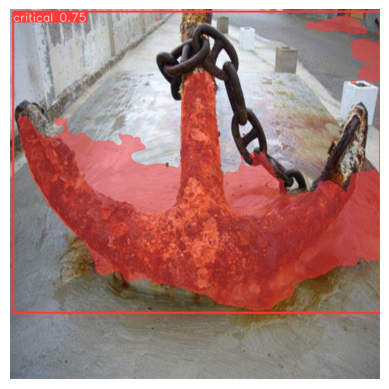

In [ ]:
inputGambar()

Model mampu mengklasifikasikan gambar jangkar tsb sebagai "critical" dengan skor kepercayaan 0.75.

# Deployment on

Deployment of our model using streamlit, check our github to use our model: https://github.com/AndoZR/CorrosionLevel-Detect-Yolov8.git

### Streamlit App

On our streamlit, we could use image or videos and also source link of youtube to detect any corrosion. Change the value of confidence to detect the corrosion more effectives.

<div style="display: flex; justify-content: center; align-items: center;">
  <img
    width="460"
    src="https://drive.google.com/uc?export=view&id=1HbYmfyQI5YHCd3omN9xJ1IoEaHrlixNs"
    style="margin-right: 10px;"
  >
  <img
    width="460"
    src="https://drive.google.com/uc?export=view&id=1do0_SpwMdX7GN3BaUzf-RgXYmiMhqCfT"
  >
</div>

zipping

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r /content/model.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/segment/train/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/segment/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/segment/train/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/segment/train/MaskP_curve.png (deflated 11%)
  adding: content/runs/segment/train/val_batch2_pred.jpg (deflated 4%)
  adding: content/runs/segment/train/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/segment/train/MaskPR_curve.png (deflated 17%)
  adding: content/runs/segment/train/confusion_matrix.png (deflated 37%)
  adding: content/runs/segment/train/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/segment/train/BoxP_curve.png (deflated 11%)
  adding: content/runs/segment/train/BoxF1_curve.png (deflated 12%)
  adding: content/runs/se

# Conclusion

## Overall Conclusion

Pertama pemilihan model YOLOv8n daripada yang lain:

- Ukuran dan Kecepatan: YOLOv8n memiliki ukuran model yang relatif kecil (3.4M parameters) dan kecepatan inferensi yang cepat (96.1 ms CPU ONNX). Ini membuatnya cocok untuk aplikasi **real-time** atau yang membutuhkan respons cepat.

- Performa Deteksi: Meskipun ukurannya lebih kecil, YOLOv8n masih mampu memberikan performa deteksi yang baik dengan mAPbox 50-95 sebesar 36.7% dan mAPmask 50-95 sebesar 30.5% berdasarkan komparasi. Ini menunjukkan bahwa model ini dapat melakukan deteksi objek dengan akurasi yang memadai.

- Efficiency: YOLOv8n menawarkan efisiensi dalam penggunaan sumber daya komputasi, seperti memori dan daya komputasi. Hal ini bisa menjadi pertimbangan penting terutama dalam implementasi di lingkungan dengan keterbatasan sumber daya.


Kedua, model cukup kuat dalam pendeteksian label critical daripada moderate bersarkan analisa kami hal ini bersumber dari dataset yang didapat dikarenakan label critical lebih dominan daripada moderate sehingga model lebih banyak mendeteksi critical saat training.

## Recommendation

- Untuk meningkatkan performa segmentasi, disarankan untuk melakukan penyeimbangan data dan pelabelan ulang yang konsisten atau menambah data image pada moderate agar kedua label seimbang.
- Menggunakan model jenis YOLOV8 segmentation yang lebih kuat dalam akurasi seperti YOLOv8x-seg dan lainnya. agar akurasi prediksi lebih tinggi.
- Pada implementasi aplikasi diberikan output saran penyelesaian atau detail impact korosi

Dengan pendekatan ini, diharapkan model dapat memberikan hasil segmentasi yang lebih akurat, sehingga implementasi dalam dunia bisnis lebih efisien untuk mengetahui tingkat korosi suatu lapisan logam pada teknologi, mesin, pabrik, dan lain-lain.